In [1]:
import csv

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cStringIO import StringIO  # Import StringIO for Python 2

# Open the file and specify the delimiter
file_path = 'AirQuality.csv'
with open(file_path, 'r') as file:
    # Read the content of the file
    content = file.read()

# Parse the content using the csv module with the specified delimiter
# Use StringIO to create a file-like object from the string content
csv_file = StringIO(content)
data = list(csv.reader(csv_file, delimiter=';'))

# Assuming the first row contains column headers
column_names = data[0]
data = data[1:]

# Convert the list of lists into a Pandas DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the first few rows of the data
print(df.head())

# Get basic statistics of numeric columns
print(df.describe())

# Check data types and missing values
print(df.info())

# Plot histograms for numeric columns
df.hist(figsize=(10, 8))
plt.show()

# Create a correlation heatmap for numeric variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

         Date      Time CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6        1360      150     11,9          1046   
1  10/03/2004  19.00.00      2        1292      112      9,4           955   
2  10/03/2004  20.00.00    2,2        1402       88      9,0           939   
3  10/03/2004  21.00.00    2,2        1376       80      9,2           948   
4  10/03/2004  22.00.00    1,6        1272       51      6,5           836   

  NOx(GT) PT08.S3(NOx) NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH    \
0     166         1056     113         1692        1268  13,6  48,9  0,7578     
1     103         1174      92         1559         972  13,3  47,7  0,7255     
2     131         1140     114         1555        1074  11,9  54,0  0,7502     
3     172         1092     122         1584        1203  11,0  60,0  0,7867     
4     131         1205     116         1490        1110  11,2  59,6  0,7888     

     
0    
1    
2    
3    
4    
        

ValueError: num must be 1 <= num <= 0, not 1

In [ ]:
# Replace commas with periods and remove extra spaces and characters from column names and values
df.columns = df.columns.str.strip().str.replace(
    ' ', '_').str.replace('_(GT)', '')
df.replace(',', '.', regex=True, inplace=True)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.apply(lambda x: x.str.replace(' ', '') if x.dtype == "object" else x)
df = df.apply(pd.to_numeric, errors='coerce')

# Check the cleaned DataFrame
print(df.head())


   Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0   NaN   NaN     2.6       1360.0     150.0      11.9         1046.0   
1   NaN   NaN     2.0       1292.0     112.0       9.4          955.0   
2   NaN   NaN     2.2       1402.0      88.0       9.0          939.0   
3   NaN   NaN     2.2       1376.0      80.0       9.2          948.0   
4   NaN   NaN     1.6       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH          
0  0.7578 NaN NaN  
1  0.7255 NaN NaN  
2  0.7502 NaN NaN  
3  0.7867 NaN NaN  
4  0

In [ ]:
# Replace invalid values with NaN
df.replace(-200, pd.NA, inplace=True)

# Handle missing values (drop rows with NaN for now)
df.dropna(inplace=True)

# Check the DataFrame after handling missing values
print(df.head())

# Check basic statistics again
print(df.describe())

# Check data types and missing values again
print(df.info())


AttributeError: 'module' object has no attribute 'NA'

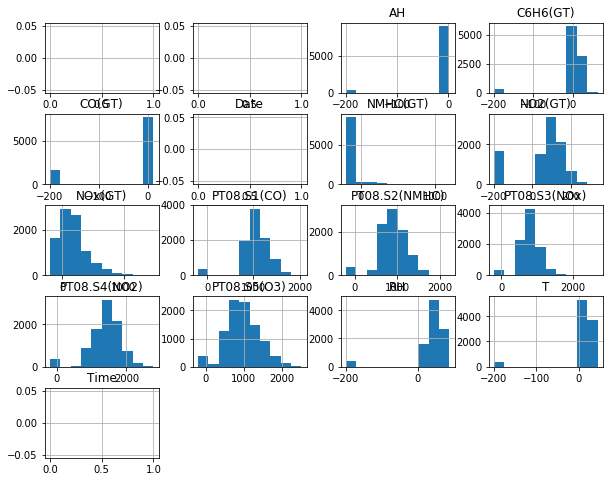

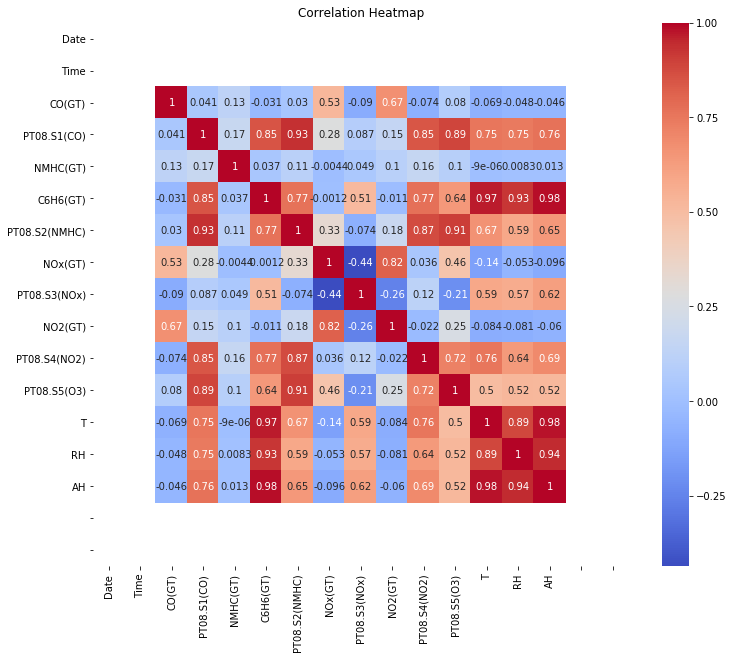

In [ ]:
# Plot histograms for numeric columns
df.hist(figsize=(10, 8))
plt.show()

# Create a correlation heatmap for numeric variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
